# Test Exception

## Definition

An Exception is an event, which occurs during the execution of a program that disrupts the normal flow of the program’s instructions or in simple words, any issue which makes your test case stop in between the execution.

source: [click me](https://www.linkedin.com/pulse/11-most-common-exceptions-selenium-webdriver-logic-qa/)

When Selenium is used to run tests, exceptions can occur if there is a problem with the test script, the browser, or the application being tested.

Some examples of Selenium test exceptions include:

- `NoSuchElementException` <br>
raised when the script tries to interact with an element on the page that does not exist.
- `TimeoutException` <br>
raised when a command takes longer than the specified amount of time to complete.
- `NoSuchWindowException` <br> 
raised when the script tries to switch to a window that does not exist.
- `StaleElementReferenceException` <br>
raised when the script tries to interact with an element that is no longer attached to the DOM.

These are just a few examples and there are many more exception types that Selenium may raise, depending on the situation. It is important to handle these exceptions properly in order to avoid the script to stop working and to get a clear understanding of what went wrong.

# Test Exceptions

Page to test: https://practicetestautomation.com/practice-test-exceptions/

## Test case 1: NoSuchElementException

1. Open page
2. Click Add button
3. Verify Row 2 input field is displayed

Row 2 doesn’t appear immediately. This test will fail with org.openqa.selenium.NoSuchElementException without proper wait

In [ ]:
def test_no_element_exception(self, driver):
    # Open the page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")

    """Click Add button on Row 1"""
    # Verify The Row1 is displayed
    row1_locator = driver.find_element(By.ID, "row1")
    assert row1_locator.is_displayed()

    # Click Add button
    add_locator = driver.find_element(By.ID, "add_btn")
    assert add_locator.is_displayed(), "'Add' Button is missing"
    add_locator.click()

    """Row 2 Is displayed"""
        # Verify Row 2 availability
    row2_locator = driver.find_element(By.ID, "row2")
    assert row2_locator.is_displayed(), "Row 2 Is missing"
    
    # Verify the Toast bar is displayed
    toast_locator = driver.find_element(By.ID, "confirmation")
    actual_toast_msg = toast_locator.text
    assert actual_toast_msg == "Row 2 was added", "Added Toast Message is incorrect"



Previous script is correct when implemented normally, but on this case we'll receive this error <br>
`(TestException.test_no_element_exception) '' != 'Row 2 was added'`

This issue occurs because:
1. The elements is not loaded yet
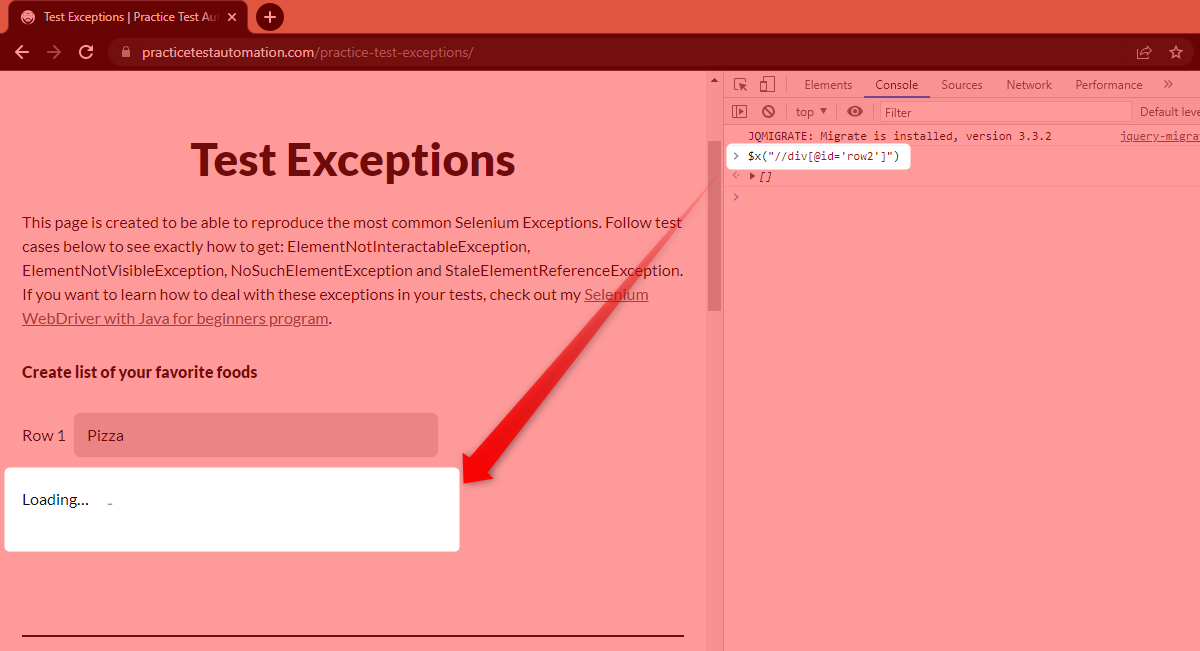 <br>
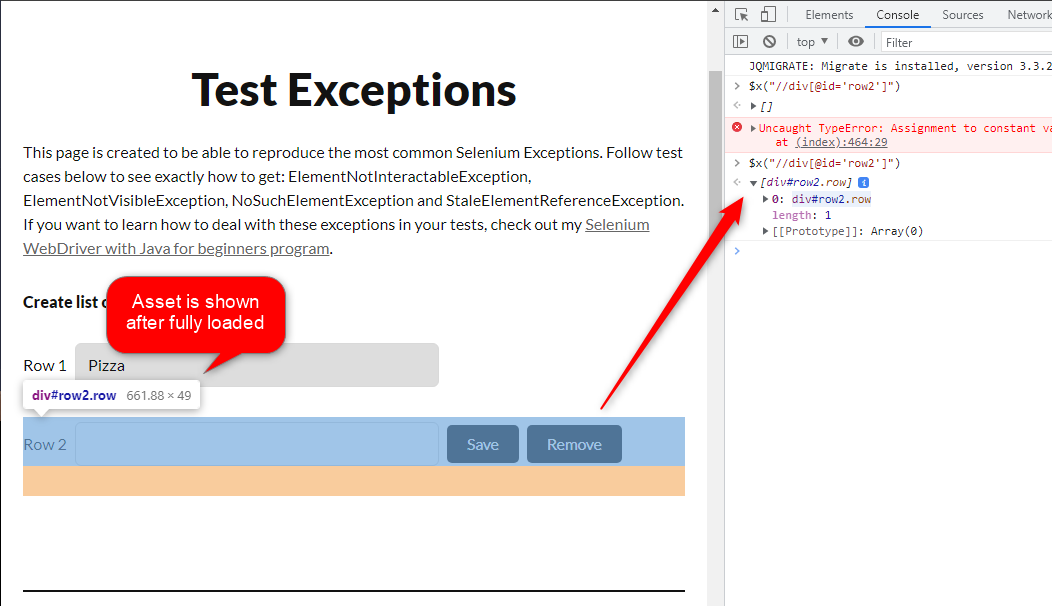
2. The waiting time for the asset fully loaded is less than actual loading time
3. The driver will return `"no element error"` since the assets is not there, when the script is executed.

Workaround for this issue is using explicit wait as described on the `4_1 python` file
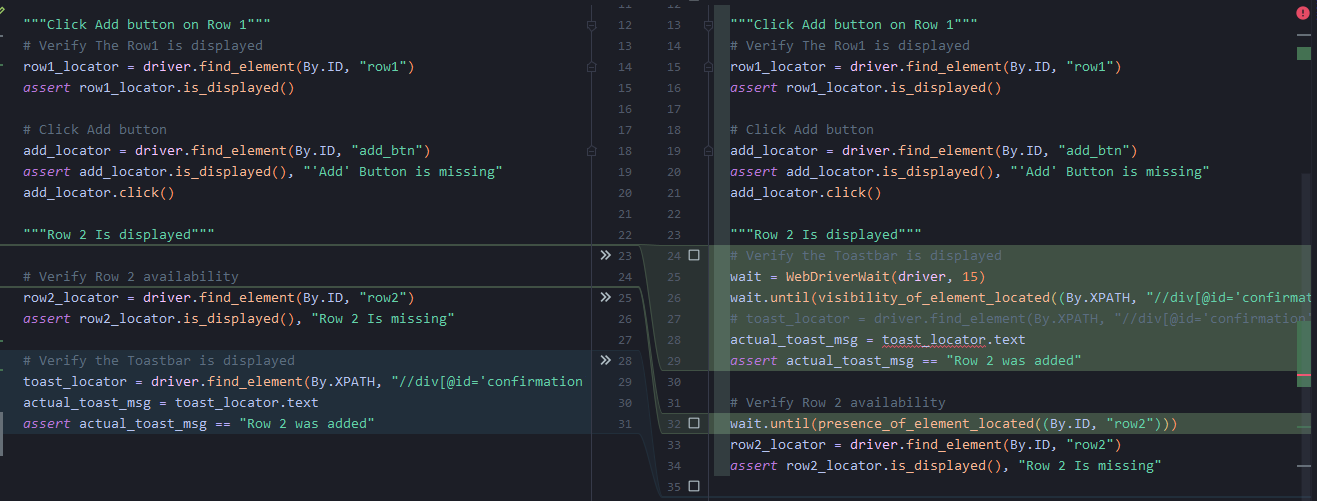

## Test case 2: ElementNotInteractableException

1. Open page
2. Click Add button
3. Wait for the second row to load
4. Type text into the second input field
5. Push Save button using locator By.name(“Save”)
6. Verify text saved

This page contains two elements with attribute name=”Save”.
The first one is invisible. So when we are trying to click on the invisible element, we get ElementNotInteractableException.

In [ ]:
def test_not_intractable_element(self, driver):
    # Open The Page
    driver.get("https://practicetestautomation.com/practice-test-exceptions/")

    "Click Add button on Row 1"
    driver.find_element(By.ID, "add_btn").click()

    "Type text into the second input field"
    # Pass the text to the text box
    row2_input_locator = driver.find_element(By.XPATH, "//div[@id='row2']/input")
    row2_input_locator.send_keys("Written using python selenium")

    "Push Save button using locator By.name('Save')"
    save_btn_locator = driver.find_element(By.NAME, "Save")
    save_btn_locator.click()

    "Verify text saved"
    wait = WebDriverWait(driver, 30)
    save_toast_locator = wait.until(elem_vis((By.ID, "confirmation")))
    actual_save_toast = save_toast_locator.text
    assert actual_save_toast == "Row 2 was saved", "Saved Toast Message is incorrect"

By Running those scripts, we'll receive this error syntax <br>
`selenium.common.exceptions.ElementNotInteractableException: Message: element not interactable` <br>

This is the actual reason why this issue occurs:
1. We defined the script to find any elements with the "Save" name
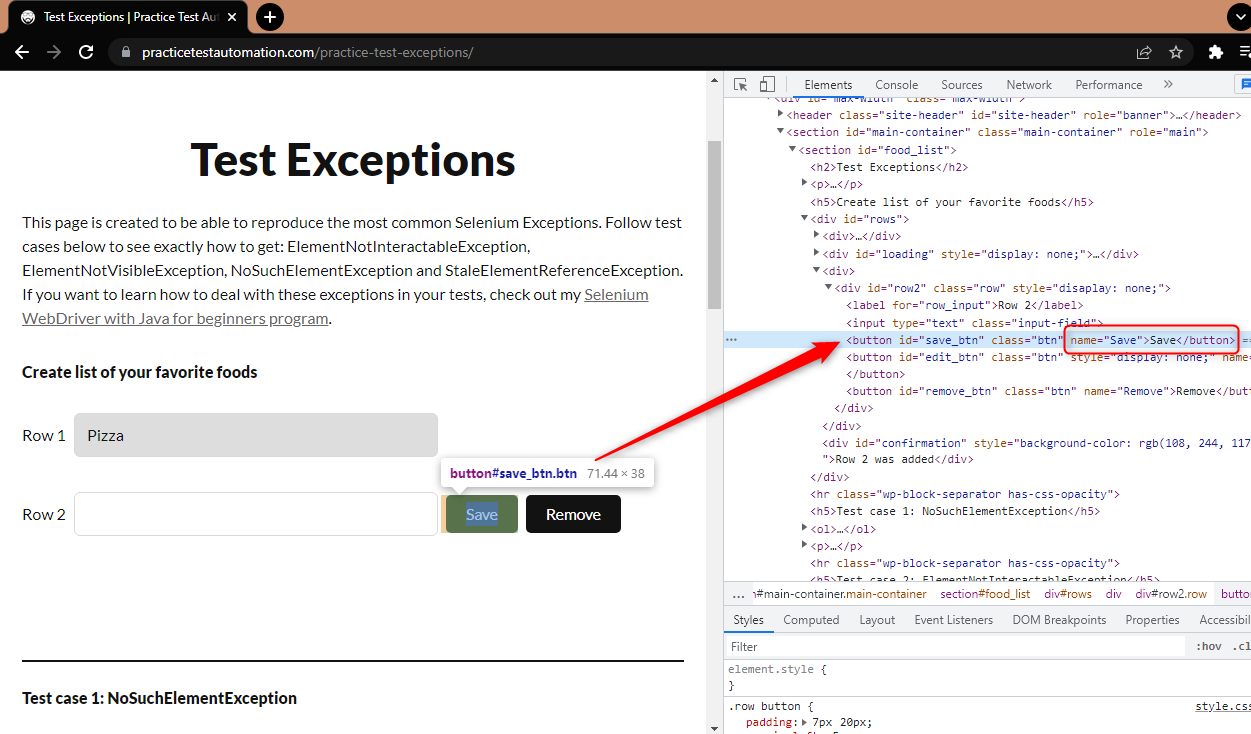
2. This is a correct locator but not unique elements
3. To validate wether this is an unique or not, we can use the console tab
4. `$x("//button[@name='Save']")`, will return all button object with the "Save" name
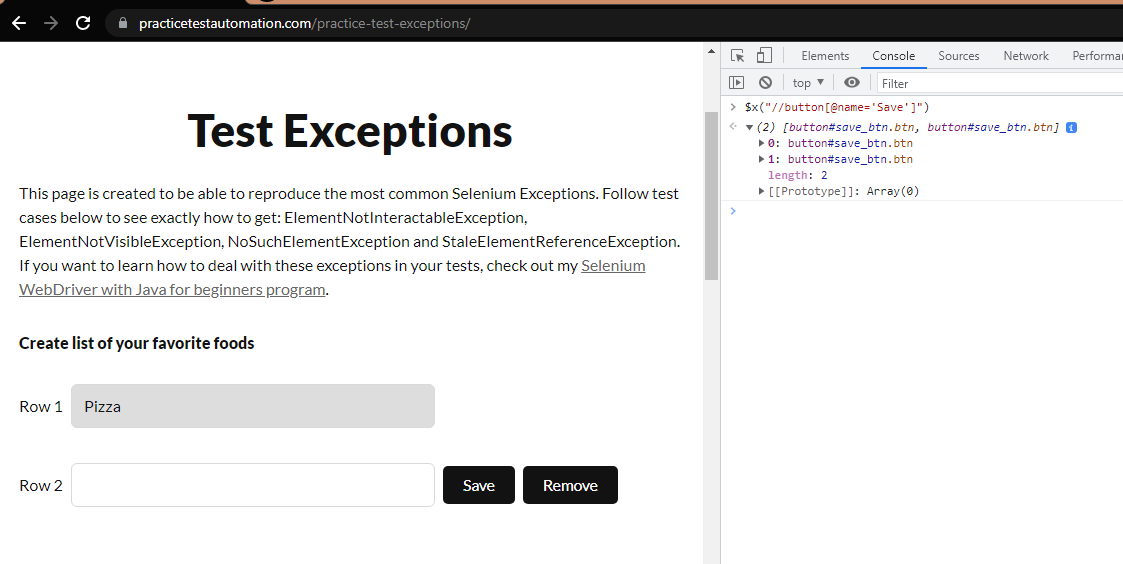
5. Check both returned elements
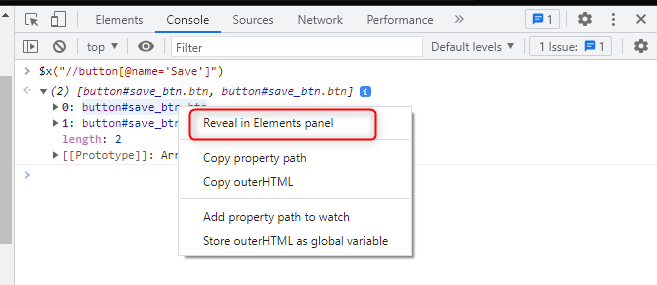
6. Notice that, there are another 'hidden' Save button on the elements
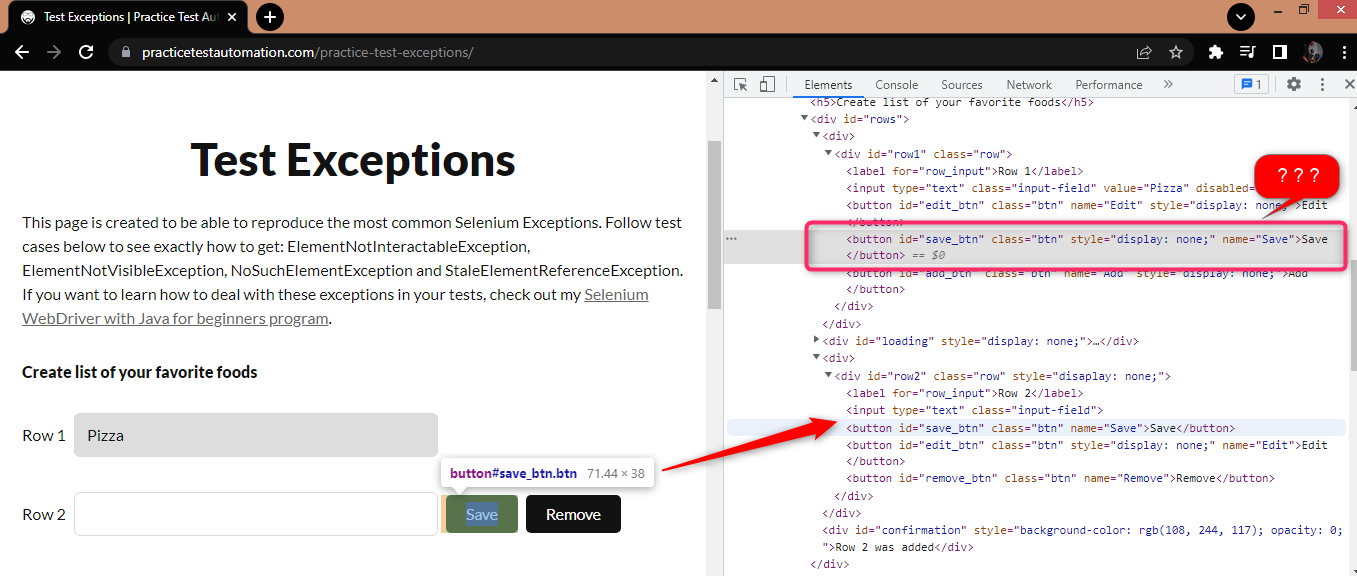

The hidden "Save" button can be revealed by editing Row 1
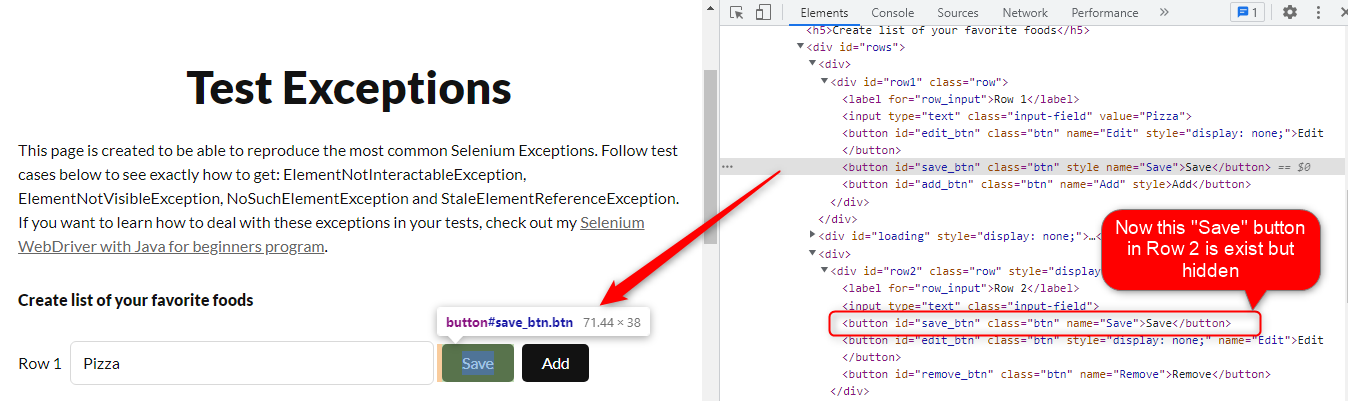

The solution for this issue is simply change the locator method using unique identifier

    Before

In [ ]:
"Push Save button using locator By.name('Save')"
save_btn_locator = driver.find_element(By.NAME, "Save")
save_btn_locator.click()


    After

In [ ]:
save_btn_locator = driver.find_element(By.XPATH, "//div[@id='row2']/button[@name='Save']")
save_btn_locator.click()